In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

2026-02-22 12:33:23.860142: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-22 12:33:44.217794: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-22 12:33:54.150167: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Data Load

In [2]:
df=pd.read_csv('/workspaces/Customer-Churn-Prediction/Data/cleaned_churn_data.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [3]:
df.shape

(7043, 20)

In [4]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [6]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

Train-Test Split

In [7]:
x=df.drop(columns=['Churn'])
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [8]:
y=df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Preprocessing

In [10]:
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

In [11]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,610
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,4319
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,1940
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,2012
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0


In [12]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(5634, 19)
(1409, 19)


SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

x_train_smote,y_train_smote=smote.fit_resample(x_train_scaled,y_train)

In [14]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(8276, 19)
(8276,)


ANN

In [26]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=19,kernel_initializer='he_uniform'))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))

model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
callback=EarlyStopping(monitor='val_loss',patience=5)

In [34]:
F_train=model.fit(x_train_smote,y_train_smote,epochs=50,batch_size=32,validation_data=(x_test_scaled,y_test),callbacks=[callback])

Epoch 1/50
  1/259 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7812 - loss: 0.2812

259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8635 - loss: 0.2989 - val_accuracy: 0.7551 - val_loss: 0.7243
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8645 - loss: 0.2972 - val_accuracy: 0.7630 - val_loss: 0.7036
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.2962 - val_accuracy: 0.7615 - val_loss: 0.7254
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8690 - loss: 0.2976 - val_accuracy: 0.7743 - val_loss: 0.7139
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3007 - val_accuracy: 0.7445 - val_loss: 0.7545
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8710 - loss: 0.2968 - val_accuracy: 0.7523 - val_loss: 0.7027
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.2995 - val_accuracy: 0.7630 - val_loss: 0.7146
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8703 - loss: 0.2901 - val_accuracy: 0.7480 - val_

In [35]:
history=F_train.history
print(history)
print(history.keys())

{'accuracy': [0.8634606003761292, 0.8645480871200562, 0.8707104921340942, 0.8690188527107239, 0.8662397265434265, 0.8709521293640137, 0.8622522950172424, 0.8703479766845703, 0.8674480319023132, 0.8722813129425049, 0.8699855208396912], 'loss': [0.2989037036895752, 0.2971804738044739, 0.2961721420288086, 0.29764512181282043, 0.30072876811027527, 0.2968093752861023, 0.29954221844673157, 0.2901303470134735, 0.29575222730636597, 0.2910284399986267, 0.29056060314178467], 'val_accuracy': [0.7551454901695251, 0.762952446937561, 0.7615330219268799, 0.7743080258369446, 0.7444996237754822, 0.7523065805435181, 0.762952446937561, 0.7480482459068298, 0.7515968680381775, 0.7544357776641846, 0.760113537311554], 'val_loss': [0.7242598533630371, 0.7035642266273499, 0.7253838777542114, 0.7138674259185791, 0.7545177340507507, 0.7027352452278137, 0.7145584225654602, 0.7390183210372925, 0.7288562059402466, 0.7413267493247986, 0.7480140328407288]}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [36]:
print(history['accuracy'][-1])

0.8699855208396912


In [37]:
print(history['val_accuracy'][-1])

0.760113537311554


In [38]:
y_pred=model.predict(x_test_scaled)
y_pred

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[7.9886025e-01],
       [2.7359290e-02],
       [1.9513427e-08],
       ...,
       [1.4907815e-02],
       [1.0385115e-11],
       [3.2162166e-01]], shape=(1409, 1), dtype=float32)

In [ ]:
yp=(model.predict(x_test_scaled)>0.3).astype(np.int32) #0.3 as we tuned the threshhold for ML
yp

 1/45 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], shape=(1409, 1), dtype=int32)

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,yp))

0.7267565649396736


In [47]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1036
           1       0.49      0.76      0.60       373

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.73      0.74      1409



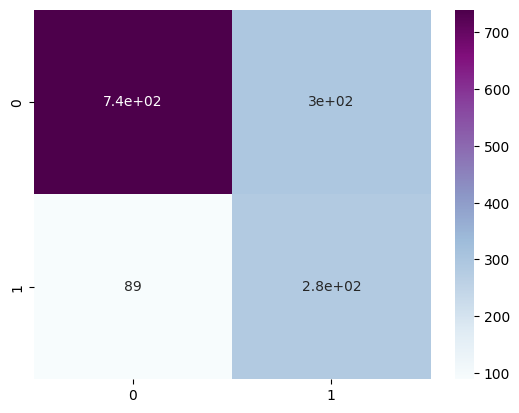

In [48]:
cm=confusion_matrix(y_test,yp)
cm
sn.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8119753226991834

In conclusion eventhough ANN has higher accuracy score the recall and auc value is less than LightGBM. Hence, LightGBM is the best model 

Exports

In [50]:
model.save('/workspaces/Customer-Churn-Prediction/Models/deep_learning_model.keras')

PowerBI Export

In [55]:
yp=(model.predict(x_test_scaled)>0.3).astype(np.int32)
Ann_df=x_test.copy()
Ann_df["Actual Value"]= y_test.values
Ann_df["Predicted Value"]=yp

Ann_df.to_csv('/workspaces/Customer-Churn-Prediction/PowerBI/Deep Learning/Ann_predictions.csv',index=False)

 1/45 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [53]:
accuracy=accuracy_score(y_test,yp)

pd.DataFrame({
    "Metric":["Accuracy"],
    "Value":[accuracy]
}).to_csv("/workspaces/Customer-Churn-Prediction/PowerBI/Deep Learning/Ann_accuracy.csv", index=False)

In [54]:
Ann_report=classification_report(y_test,yp,output_dict=True)
report_df=pd.DataFrame(Ann_report).transpose().reset_index()
report_df.rename(columns={"index": "Class"}, inplace=True)

report_df.to_csv("/workspaces/Customer-Churn-Prediction/PowerBI/Deep Learning/Ann_classification_report.csv", index=False)